In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing.image import img_to_array, image
from keras.models import Sequential, load_model
from keras.optimizers import adam_v2
import numpy as np 
import cv2  
import os
import matplotlib.pyplot as plt
print("Libraries loaded successfully")

Libraries loaded successfully


Loading a trainimage...


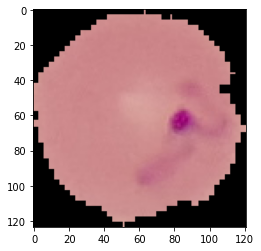

In [2]:
print("Loading a trainimage...")
img = load_img("Dataset/Train/Parasite/C133P94ThinF_IMG_20151004_155721_cell_111.png")
plt.imshow(img)

In [3]:
cv2.imread("Dataset/Train/Parasite/C133P94ThinF_IMG_20151004_155721_cell_111.png").shape

(124, 121, 3)

In [4]:
train = ImageDataGenerator(rescale=1./255)
validation_data = ImageDataGenerator(rescale=1./255)

In [5]:
train_data = train.flow_from_directory("Dataset/Train", target_size=(200,200), batch_size=32, class_mode="categorical")                                   

validation_data = train.flow_from_directory("Dataset/Test", target_size=(200,200), batch_size=32, class_mode="categorical")

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [6]:
input_shape = (200, 200, 3)

In [7]:
print(train_data.class_indices)

{'Parasite': 0, 'Uninfected': 1}


In [8]:
print(validation_data.class_indices) 

{'Parasite': 0, 'Uninfected': 1}


In [9]:
print(train_data.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [10]:
model = keras.models.Sequential([keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
                                    keras.layers.MaxPool2D(2, 2),
                                    
                                    keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                    keras.layers.MaxPool2D(2, 2),
                                    
                                    keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    keras.layers.MaxPool2D(2, 2),
                                    
                                    keras.layers.Flatten(),
                                    
                                    keras.layers.Dense(512, activation='relu'),
                                    
                                    keras.layers.Dense(2, activation='softmax')
                                    ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=adam_v2.Adam(learning_rate=0.001), metrics=['accuracy'])

In [13]:
model_fit = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
13/13 [==============================] - 11s 807ms/step - loss: 1.2247 - accuracy: 0.5433 - val_loss: 0.6553 - val_accuracy: 0.6716
Epoch 2/30
13/13 [==============================] - 10s 763ms/step - loss: 0.6057 - accuracy: 0.6635 - val_loss: 0.6918 - val_accuracy: 0.5075
Epoch 3/30
13/13 [==============================] - 9s 707ms/step - loss: 0.4301 - accuracy: 0.8125 - val_loss: 0.9699 - val_accuracy: 0.4104
Epoch 4/30
13/13 [==============================] - 9s 673ms/step - loss: 0.3358 - accuracy: 0.8486 - val_loss: 0.7795 - val_accuracy: 0.6866
Epoch 5/30
13/13 [==============================] - 8s 653ms/step - loss: 0.3140 - accuracy: 0.8534 - val_loss: 0.9508 - val_accuracy: 0.5299
Epoch 6/30
13/13 [==============================] - 9s 672ms/step - loss: 0.1784 - accuracy: 0.9279 - val_loss: 0.5701 - val_accuracy: 0.7015
Epoch 7/30
13/13 [==============================] - 9s 661ms/step - loss: 0.1602 - accuracy: 0.9447 - val_loss: 1.0076 - val_accuracy: 0.5299
Epoc

In [14]:
model.save('model_cv2.h5')

In [15]:
model = load_model("model_cv2.h5")

In [16]:
# Loading the test data from the local machine

dir_path = "Dataset/Testing_Sample"

In [17]:
dir_path.index

<function str.index>

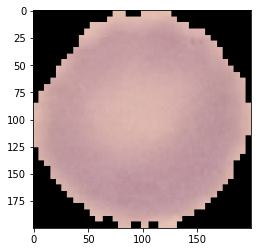

The person is not infected with the Malaraia parasite


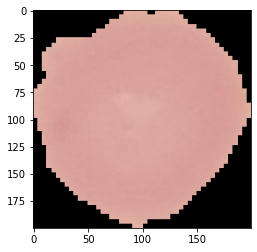

The person is not infected with the Malaraia parasite


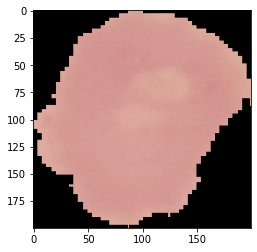

The person is not infected with the Malaraia parasite


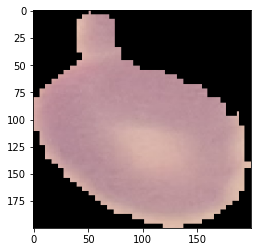

The person is not infected with the Malaraia parasite


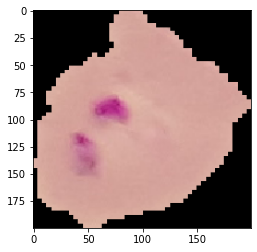

The person is infected with the Malaria parasite


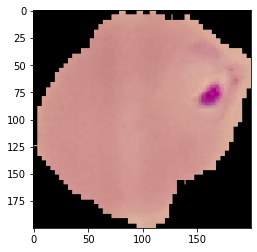

The person is infected with the Malaria parasite


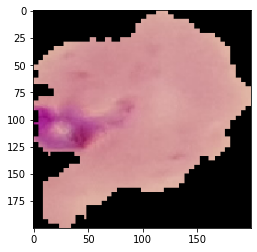

The person is infected with the Malaria parasite


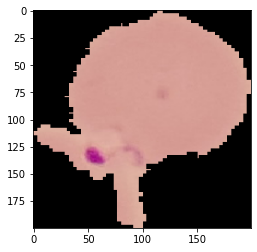

The person is infected with the Malaria parasite


In [18]:
# Listing all the files in the directory

for i in os.listdir(dir_path):
    test_images = len(os.listdir(dir_path))
    img = image.load_img(dir_path + '\\' + i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    
# Converting the image to a numpy array   

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
# Loading the model  

    classes = model.predict(images)
    classes = np.argmax(classes, axis=1)
    
# Printing the results   

    if classes == 1:
        print("The person is not infected with the Malaraia parasite")
    else:
        print("The person is infected with the Malaria parasite")